<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S7_intro_ML/S7-Demo3_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7: Introduction to ML - Classification

## Demo 3: Classification on Customer Churn Dataset

Classification using customer service churn dataset (https://www.kaggle.com/blastchar/telco-customer-churn)

In [1]:
import sklearn
from sklearn import *
sklearn.__version__

'0.22.1'

In [11]:
import pandas as pd
# Load transformed dataset
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S7_intro_ML/data/Telco-Customer-Churn_dummies.csv'
customer_data = pd.read_csv(url)

selected_features = customer_data.columns[1:-1].values #take only column 2 until the column prior to the predicted value (the last column is the label)
print(selected_features)
X = customer_data[selected_features].values
y = customer_data['Churn_Yes'].values
customer_data.head(5)

['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No' 'OnlineSecurity_Yes'
 'OnlineBackup_Yes' 'DeviceProtection_Yes' 'TechSupport_Yes'
 'StreamingTV_Yes' 'StreamingMovies_Yes' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [0]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

### 1. Logistic regression model

In [4]:
# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Logistic Regression: Training accuracy: 0.804
Logistic Regression: Testing accuracy: 0.803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 2. Decision tree model

In [5]:
# Run decision tree
tree = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree: Training accuracy: 0.998
Decision Tree: Testing accuracy: 0.728


#### Explore feature importance and tree

In [6]:
print(selected_features)
print(tree.feature_importances_)

['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No' 'OnlineSecurity_Yes'
 'OnlineBackup_Yes' 'DeviceProtection_Yes' 'TechSupport_Yes'
 'StreamingTV_Yes' 'StreamingMovies_Yes' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']
[0.02016947 0.20541234 0.20192093 0.20033532 0.01785826 0.02301442
 0.02093878 0.00614344 0.01771242 0.10620989 0.0081558  0.02129966
 0.01264798 0.01281799 0.01333978 0.00940799 0.01384085 0.01021719
 0.01269879 0.01527732 0.01159024 0.02668053 0.01231063]


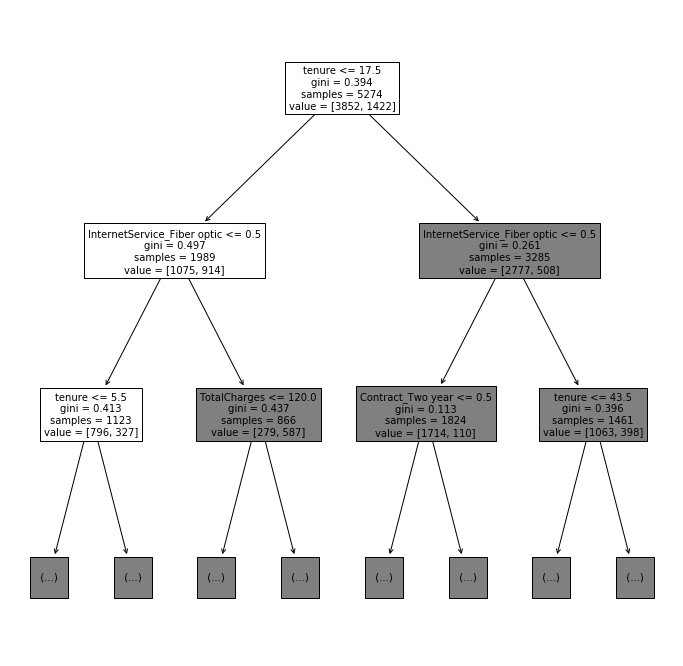

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree, feature_names=selected_features, fontsize=10, max_depth=2)
plt.show()

### 3. Evaluation - calculate precision and recall

Calculate precision and recall for the model recently fitted (either logistic regression or decision tree)

In [8]:
# calculate precision and recall

y_predict = logreg.predict(X_test) #use this for logistic regression 
# y_predict = tree.predict(X_test) #use this for decision tree

print("Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Precision score: 0.643
Recall score: 0.508


Plot precision-recall curve (see https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Text(0.5, 1.0, 'Average precision score: AP=0.63')

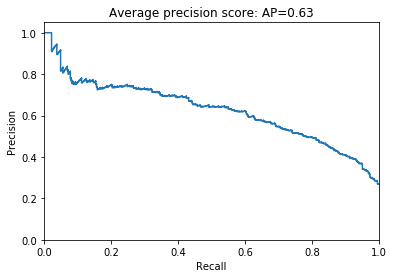

In [9]:
import matplotlib.pyplot as plt

y_prob = logreg.decision_function(X_test) #use this for logistic regression
# y_prob = tree.predict_proba(X_test)[:,1]  #use this for decision tree

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))